## 3. Projekat - Neuronske mreže

### 1. Priprema podataka:

In [25]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

dataframe = pd.read_csv("C:/Users/38164/Master studije/Masinsko ucenje/Projekat 3/bodyPerformance.csv")
dataframe

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [26]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


Svi podaci su numerickog tipa, sem pola i klase.

**Nedostajuće vrednosti**

In [27]:
dataframe.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Nema nedostajucih vrednosti.

**Duplikati**

In [28]:
dataframe.shape, dataframe.drop_duplicates().shape

((13393, 12), (13392, 12))

In [29]:
dataframe.drop_duplicates(inplace=True, ignore_index=True)

Ima 1 duplikat koji je izbacen.

------

<AxesSubplot: ylabel='gender'>

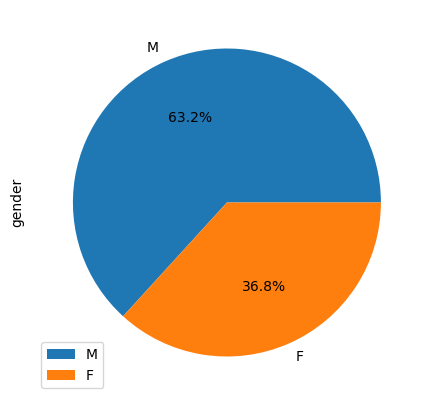

In [6]:
gender_counts = dataframe['gender'].value_counts()
df2 = pd.DataFrame({"gender": gender_counts}, index=['M', 'F'])
df2.plot.pie(y='gender', figsize=(5,5), autopct='%1.1f%%')

In [30]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
oe_results = ohe.fit_transform(dataframe[["gender"]])
new_cols_df = pd.DataFrame(oe_results.toarray(), columns=ohe.categories_[0]).astype(np.int64)
new_cols_df

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
13387,0,1
13388,0,1
13389,0,1
13390,1,0


Pol je One-hot enkodiran.

In [31]:
dataframe=dataframe.drop('gender', axis=1)

In [32]:
dataframe.insert(1, 'M',new_cols_df['M'])
dataframe.insert(2, 'F',new_cols_df['F'])
dataframe

,age,M,F,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13387,25.0,1,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13388,21.0,1,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13389,39.0,1,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13390,64.0,0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


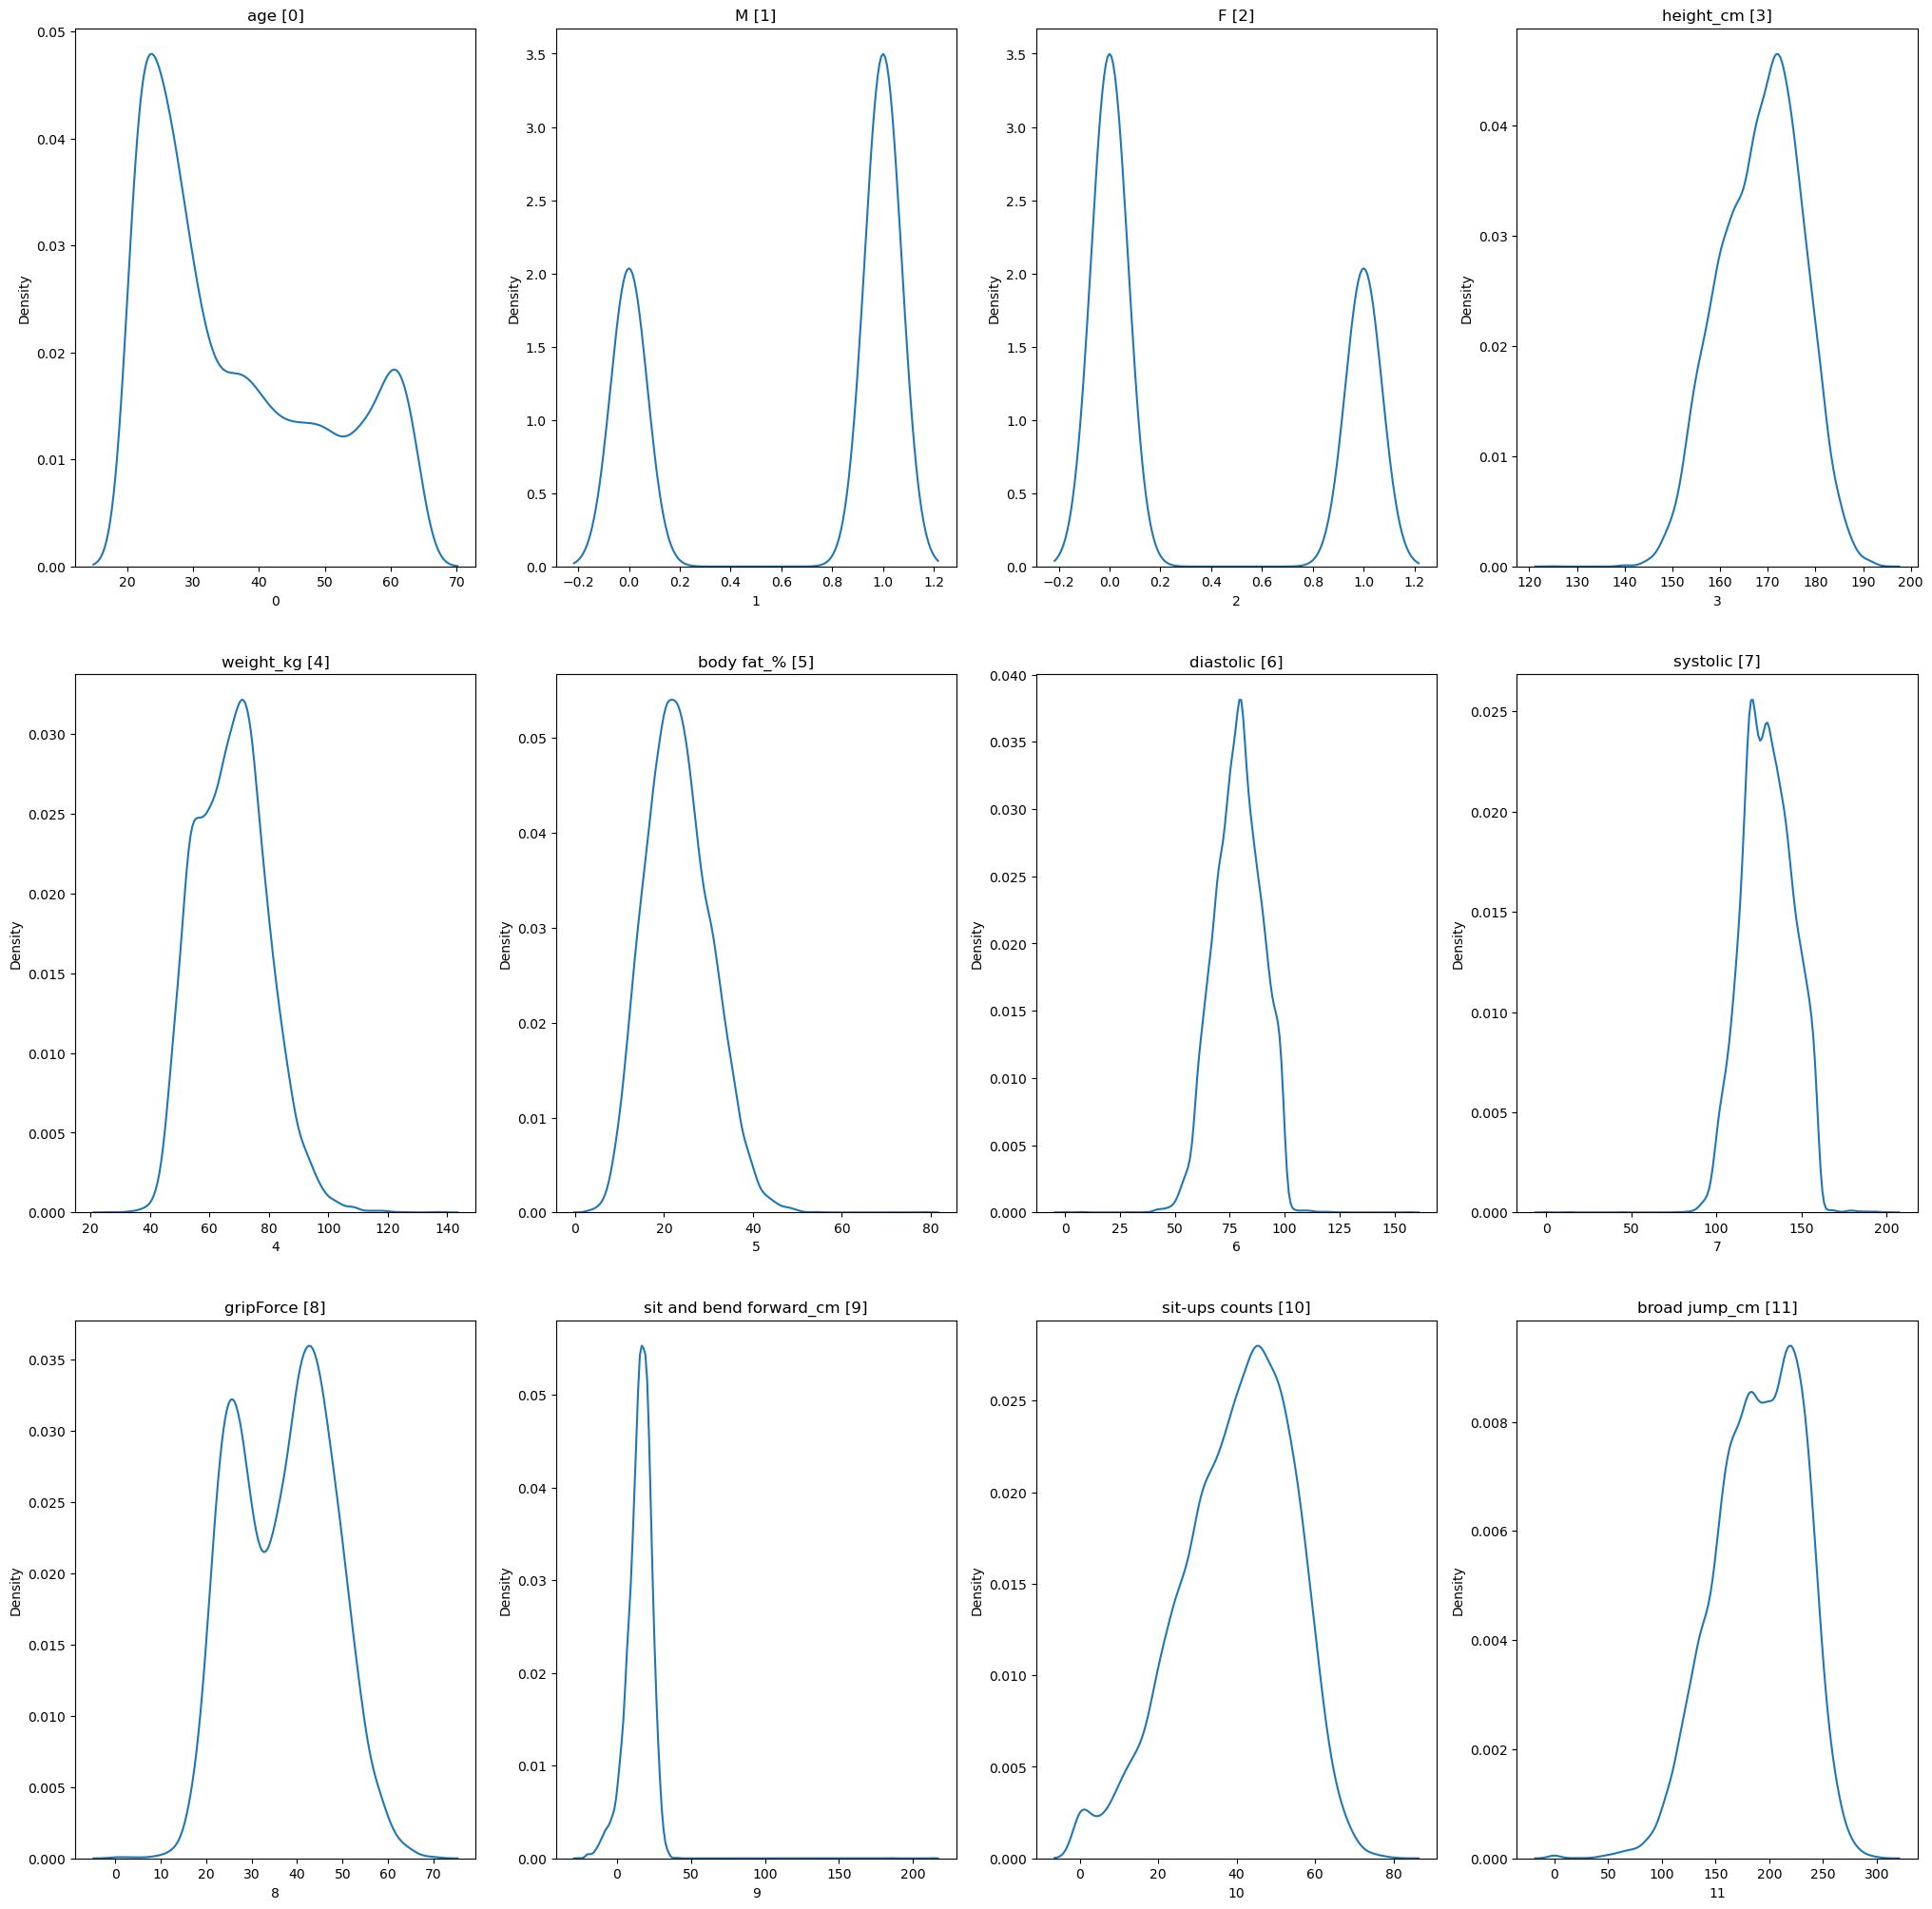

In [10]:
df = dataframe.drop(['class'], axis=1)
potential_features_to_show = df.to_numpy()

mod_df = pd.DataFrame(potential_features_to_show)
fig, axs = plt.subplots(3,4, figsize=(25,25))
for i in range(3):
    for j in range(4):
        sns.kdeplot(mod_df[4*i+j], ax=axs[i][j])
        axs[i][j].set_title('{} [{}]'.format(df.columns[4*i+j],4*i+j))
plt.show()

Podaci su normalno distribuirani osim kod godina. Zbog toga ce u nastavku biti isprobano i resenje sa binovanim godinama.

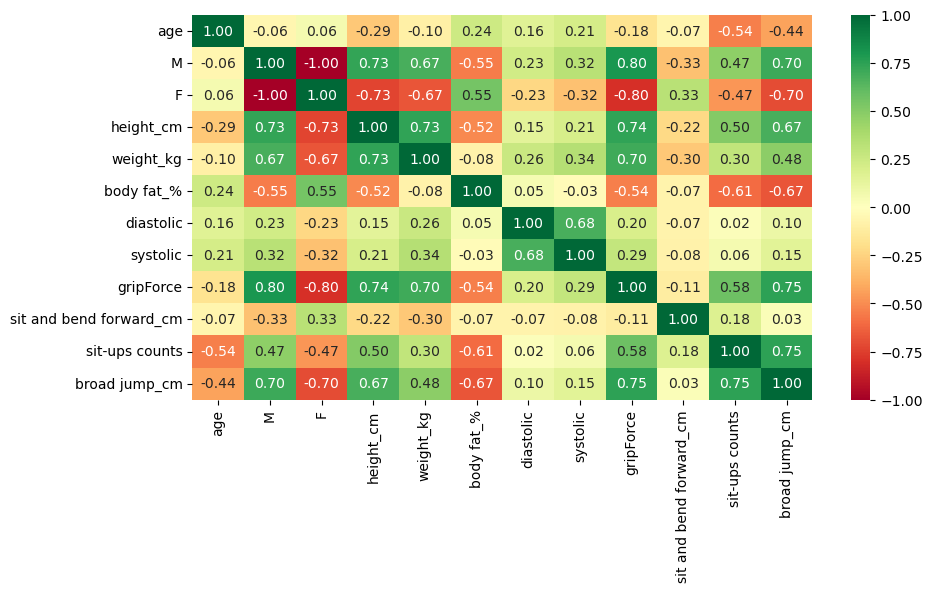

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(dataframe[dataframe.columns[:-1]].corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

**Podela godina u binove (rezervni dataframe)**

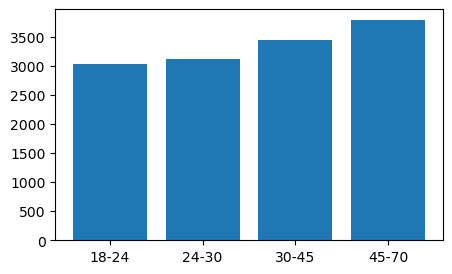

In [33]:
from sklearn.preprocessing import OneHotEncoder

df = dataframe.copy()
df.loc[df['age'].between(18, 24, 'both'), 'age_group'] = '18-24'
df.loc[df['age'].between(24, 30, 'right'), 'age_group'] = '24-30'
df.loc[df['age'].between(30, 45, 'right'), 'age_group'] = '30-45'
df.loc[df['age'].between(45, 70, 'right'), 'age_group'] = '45-70'

ohe = OneHotEncoder()
oe_results = ohe.fit_transform(df[["age_group"]])
new_cols_df = pd.DataFrame(oe_results.toarray(), columns=ohe.categories_[0]).astype(np.int64)

df = pd.concat([new_cols_df, df.drop(['age', 'age_group'], axis=1)], axis=1)
dataframe_binned_age = df.copy()

counts = []
for i in range(4):
    counts.append(dataframe_binned_age.iloc[:, i].value_counts()[1])
plt.figure(figsize=(5, 3))
plt.bar(dataframe_binned_age.columns[:4], counts)
plt.show()

**Balansiranost klasa**

<AxesSubplot: ylabel='class'>

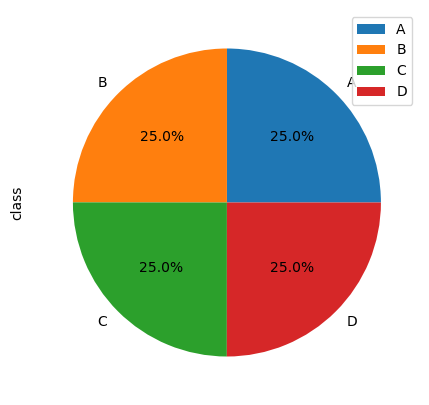

In [13]:
class_counts = dataframe['class'].value_counts()
df2 = pd.DataFrame({"class": class_counts}, index=['A', 'B', 'C', 'D'])
df2.plot.pie(y='class', figsize=(5,5), autopct='%1.1f%%')

Klase su savrseno balansirane.

### 2. Deskriptivna analiza:

In [14]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,13392.0,36.775836,13.625886,21.0,25.0,32.0,48.0,64.0
M,13392.0,0.632243,0.482213,0.0,0.0,1.0,1.0,1.0
F,13392.0,0.367757,0.482213,0.0,0.0,0.0,1.0,1.0
height_cm,13392.0,168.560671,8.426305,125.0,162.4,169.2,174.8,193.8
weight_kg,13392.0,67.448686,11.949061,26.3,58.2,67.4,75.3,138.1
body fat_%,13392.0,23.239608,7.256829,3.0,18.0,22.8,28.0,78.4
diastolic,13392.0,78.797499,10.742165,0.0,71.0,79.0,86.0,156.2
systolic,13392.0,130.238120,14.709536,0.0,120.0,130.0,141.0,201.0
gripForce,13392.0,36.964569,10.624959,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13392.0,15.208933,8.456904,-25.0,10.9,16.2,20.7,213.0


**Outlier-i**

In [15]:
from functools import reduce
       
def indices_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr =  q3 - q1
    lower_bound = q1 - iqr * 1.5
    upper_bound = q3 + iqr * 1.5
    return np.where((x > upper_bound) | (x < lower_bound))

df = dataframe.drop('class', axis=1)

indices = []
for i in range(df.shape[1]):
    indices.append(indices_of_outliers(df.iloc[:, i]))

len(reduce(np.union1d, indices))

667

In [16]:
667/13392

0.04980585424133811

In [17]:
def z_score(X, threshold):
    xt = X.transpose()
    m = np.array([xt[i].mean() for i in range(xt.shape[0])])
    s = np.array([xt[i].std() for i in range(xt.shape[0])])
    z = (X - m)/s
    
    return np.where(z > threshold)

X = dataframe.drop('class', axis=1).to_numpy()

len(z_score(X,3)[0])

135

In [18]:
135/13392

0.010080645161290322

Outlier-i su detektovani pomocu dve metode. Prva je metoda interkvartilnih opsega, a druga je z-score, odnosno broj instanci koje su van opsega od +- 3 standardne devijacije u odnosu na mean vrednost.

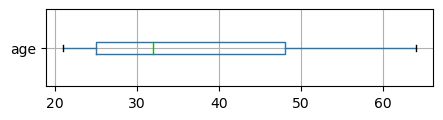

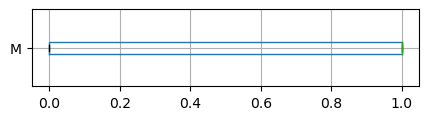

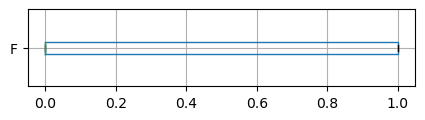

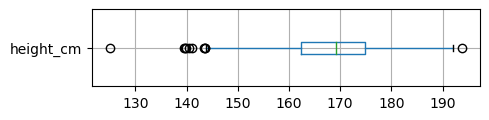

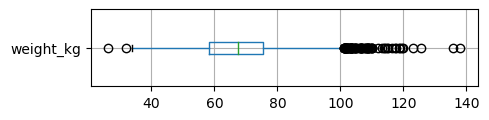

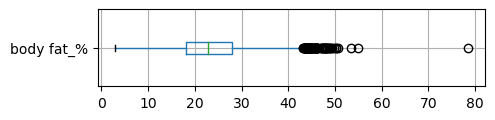

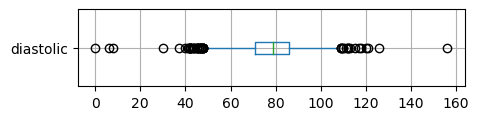

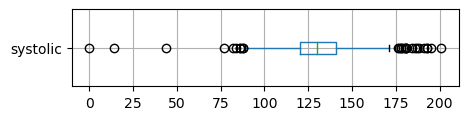

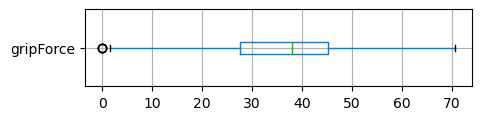

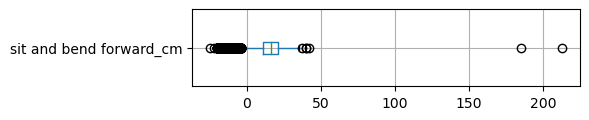

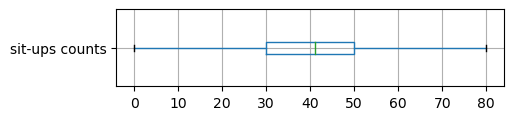

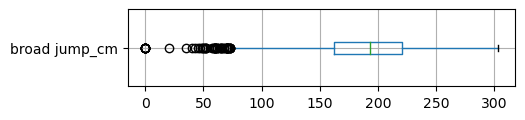

In [19]:
for i in range(dataframe.shape[1]-1):
    plt.figure(figsize=(5,1))
    dataframe.iloc[:,i:i+1].boxplot(vert=False)
    plt.show()

In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
oe_results = ohe.fit_transform(dataframe[["class"]])
new_cols_df = pd.DataFrame(oe_results.toarray(), columns=ohe.categories_[0]).astype(np.int64)

dataframe = pd.concat([dataframe.drop('class', axis=1), new_cols_df], axis=1)
dataframe

,age,M,F,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,A,B,C,D
0,27.0,1,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,0,1,0
1,25.0,1,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1,0,0,0
2,31.0,1,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,0,1,0
3,32.0,1,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1,0,0
4,28.0,1,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13387,25.0,1,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,0,0,1,0
13388,21.0,1,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,0,0,0,1
13389,39.0,1,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1,0,0,0
13390,64.0,0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,0,0,0,1


Ovde je klasni atribut One-hot enkodovan.

In [35]:
dataframe_no_outliers = dataframe.copy()

df = dataframe_no_outliers.drop(['A', 'B', 'C', 'D'], axis=1)

indices = []
for i in range(df.shape[1]):
    indices.append(indices_of_outliers(df.iloc[:, i]))
indices = reduce(np.union1d, indices)
dataframe_no_outliers = dataframe_no_outliers.drop(indices, axis=0).reset_index(drop=True)
dataframe_no_outliers

,age,M,F,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,A,B,C,D
0,27.0,1,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,0,1,0
1,25.0,1,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1,0,0,0
2,31.0,1,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,0,1,0
3,32.0,1,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1,0,0
4,28.0,1,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,25.0,1,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,0,0,1,0
12721,21.0,1,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,0,0,0,1
12722,39.0,1,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1,0,0,0
12723,64.0,0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,0,0,0,1


In [22]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
oe_results = ohe.fit_transform(dataframe_binned_age[["class"]])
new_cols_df = pd.DataFrame(oe_results.toarray(), columns=ohe.categories_[0]).astype(np.int64)

dataframe_binned_age = pd.concat([dataframe_binned_age.drop('class', axis=1), new_cols_df], axis=1)
dataframe_binned_age

,18-24,24-30,30-45,45-70,M,F,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,A,B,C,D
0,0,1,0,0,1,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,0,1,0
1,0,1,0,0,1,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1,0,0,0
2,0,0,1,0,1,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,0,1,0
3,0,0,1,0,1,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1,0,0
4,0,1,0,0,1,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13387,0,1,0,0,1,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,0,0,1,0
13388,1,0,0,0,1,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,0,0,0,1
13389,0,0,1,0,1,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1,0,0,0
13390,0,0,0,1,0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,0,0,0,1


**Priprema podataka za treniranje mreze**

In [36]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
norm = Normalizer()

features = dataframe.drop(['A','B','C','D'], axis=1).to_numpy()
target = dataframe.iloc[:, -4:].to_numpy()

standardized = scaler.fit_transform(features)
normalized = norm.fit_transform(features)

trainX, testX, trainy, testy = train_test_split(standardized, target, test_size=0.3, random_state=0)
trainX_norm, testX_norm, trainy_norm, testy_norm = train_test_split(normalized, target, test_size=0.3, random_state=0)

### 3. Treniranje mreze i podešavanje hiperparametara:

**Podešavanje širine (broja neurona u skrivenom sloju):**

nodes=1: 0.597
nodes=3: 0.629
nodes=5: 0.699
nodes=7: 0.722
nodes=11: 0.722
nodes=13: 0.734


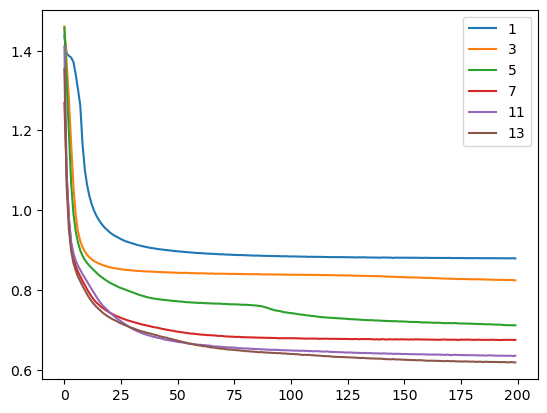

In [31]:
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    history = model.fit(trainX, trainy, epochs=200, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

num_nodes = [1, 3, 5, 7, 11, 13]
for n_nodes in num_nodes:
    history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    print("nodes=%d: %.3f" % (n_nodes, result))
    plt.plot(history.history['loss'], label=str(n_nodes))
plt.legend()
plt.show()

nodes=7: 0.717
nodes=13: 0.731
nodes=15: 0.739
nodes=17: 0.730
nodes=19: 0.735
nodes=21: 0.737


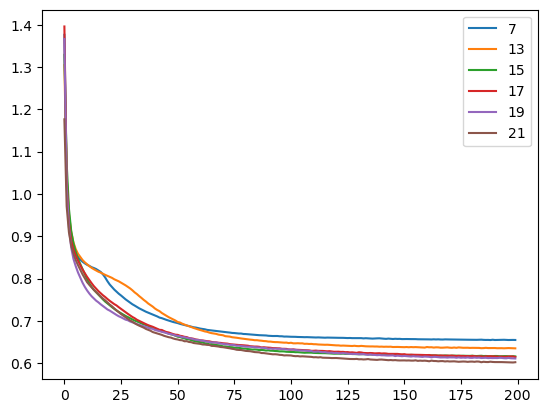

In [16]:
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    history = model.fit(trainX, trainy, epochs=200, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

num_nodes = [7, 13, 15, 17, 19, 21]
for n_nodes in num_nodes:
    history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    print("nodes=%d: %.3f" % (n_nodes, result))
    plt.plot(history.history['loss'], label=str(n_nodes))
plt.legend()
plt.show()

nodes=9: 0.719
nodes=25: 0.730


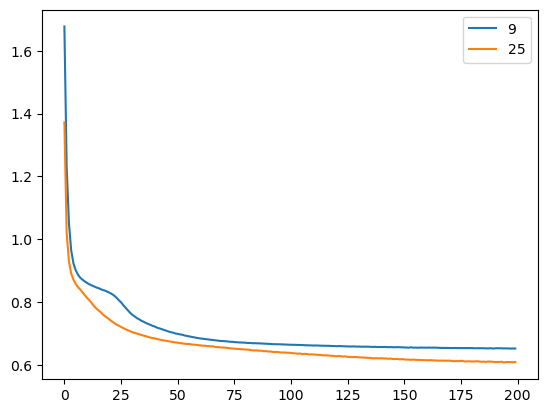

In [17]:
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    history = model.fit(trainX, trainy, epochs=200, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

num_nodes = [9, 25]
for n_nodes in num_nodes:
    history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    print("nodes=%d: %.3f" % (n_nodes, result))
    plt.plot(history.history['loss'], label=str(n_nodes))
plt.legend()
plt.show()

nodes=8: 0.712
nodes=16: 0.733


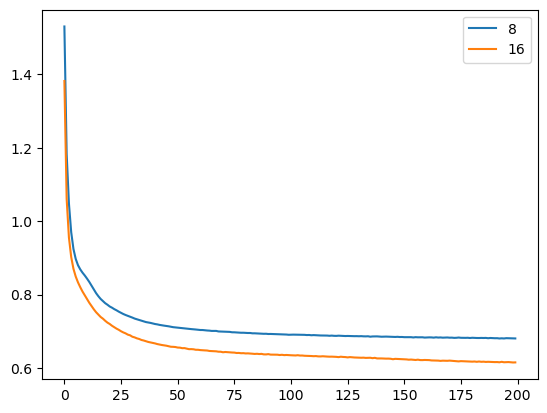

In [35]:
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    history = model.fit(trainX, trainy, epochs=200, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

num_nodes = [8, 16]
for n_nodes in num_nodes:
    history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    print("nodes=%d: %.3f" % (n_nodes, result))
    plt.plot(history.history['loss'], label=str(n_nodes))
plt.legend()
plt.show()

**Podešavanje dubine (broja skrivenih slojeva):**

layers=1: 0.718
layers=3: 0.721
layers=5: 0.733
layers=7: 0.723
layers=9: 0.728
layers=11: 0.719
layers=13: 0.716


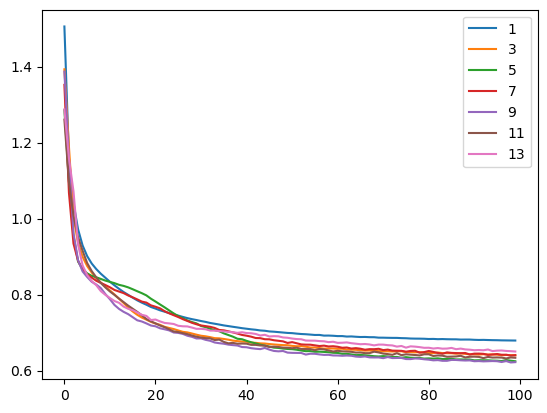

In [35]:
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    model = Sequential()
    model.add(Dense(7, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(7, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

all_history = list()
num_layers = [1, 3, 5, 7, 9, 11, 13]
for n_layers in num_layers:
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    print("layers=%d: %.3f" % (n_layers, result))
    plt.plot(history.history['loss'], label=str(n_layers))
plt.legend()
plt.show()

layers=2: 0.733
layers=8: 0.728


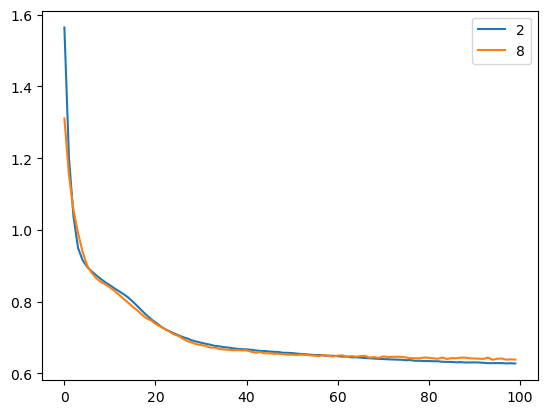

In [18]:
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    model = Sequential()
    model.add(Dense(7, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(7, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

all_history = list()
num_layers = [2, 8]
for n_layers in num_layers:
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    print("layers=%d: %.3f" % (n_layers, result))
    plt.plot(history.history['loss'], label=str(n_layers))
plt.legend()
plt.show()

layers=0: 0.723
layers=1: 0.735
layers=2: 0.739
layers=4: 0.729
layers=8: 0.734


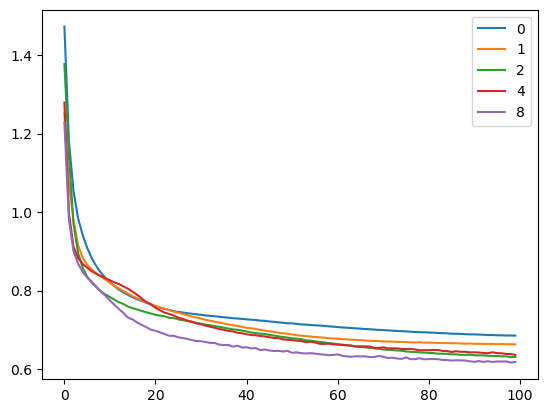

In [19]:
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    model = Sequential()
    model.add(Dense(8, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

all_history = list()
num_layers = [0, 1, 2, 4, 8]
for n_layers in num_layers:
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    print("layers=%d: %.3f" % (n_layers, result))
    plt.plot(history.history['loss'], label=str(n_layers))
plt.legend()
plt.show()

layers=0: 0.733
layers=1: 0.730
layers=2: 0.737
layers=4: 0.728
layers=8: 0.726


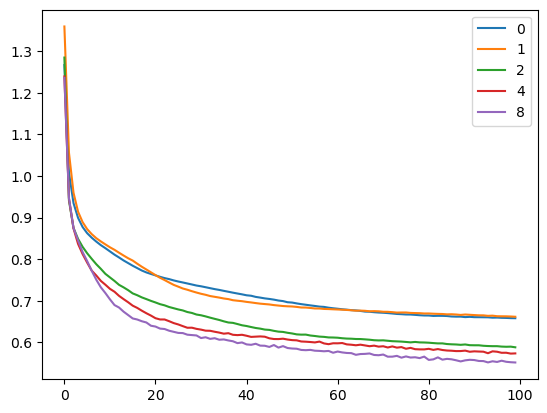

In [18]:
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    model = Sequential()
    model.add(Dense(16, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

all_history = list()
num_layers = [0, 1, 2, 4, 8]
for n_layers in num_layers:
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    print("layers=%d: %.3f" % (n_layers, result))
    plt.plot(history.history['loss'], label=str(n_layers))
plt.legend()
plt.show()

**Kombinacije širina i dubina:**

layers=1  nodes=4:  0.701
layers=1  nodes=8:  0.721
layers=1  nodes=16:  0.737
layers=2  nodes=4:  0.700
layers=2  nodes=8:  0.741
layers=2  nodes=16:  0.745
layers=4  nodes=4:  0.719
layers=4  nodes=8:  0.745
layers=4  nodes=16:  0.747
layers=8  nodes=4:  0.245
layers=8  nodes=8:  0.726
layers=8  nodes=16:  0.725


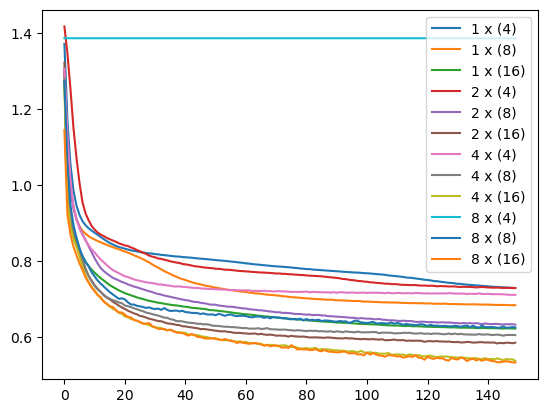

In [50]:
def evaluate_model(n_layers, n_nodes, trainX, trainy, testX, testy):
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    history = model.fit(trainX, trainy, epochs=150, batch_size=32, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

num_layers = [1, 2, 4, 8]
num_nodes = [4, 8, 16]
for n_layers in num_layers:
    for n_nodes in num_nodes:
        history, result = evaluate_model(n_layers, n_nodes, trainX, trainy, testX, testy)
        print("layers=%d  nodes=%d:  %.3f" % (n_layers, n_nodes, result))
        plt.plot(history.history['loss'], label="{} x ({})".format(n_layers, n_nodes))
plt.legend()
plt.show()

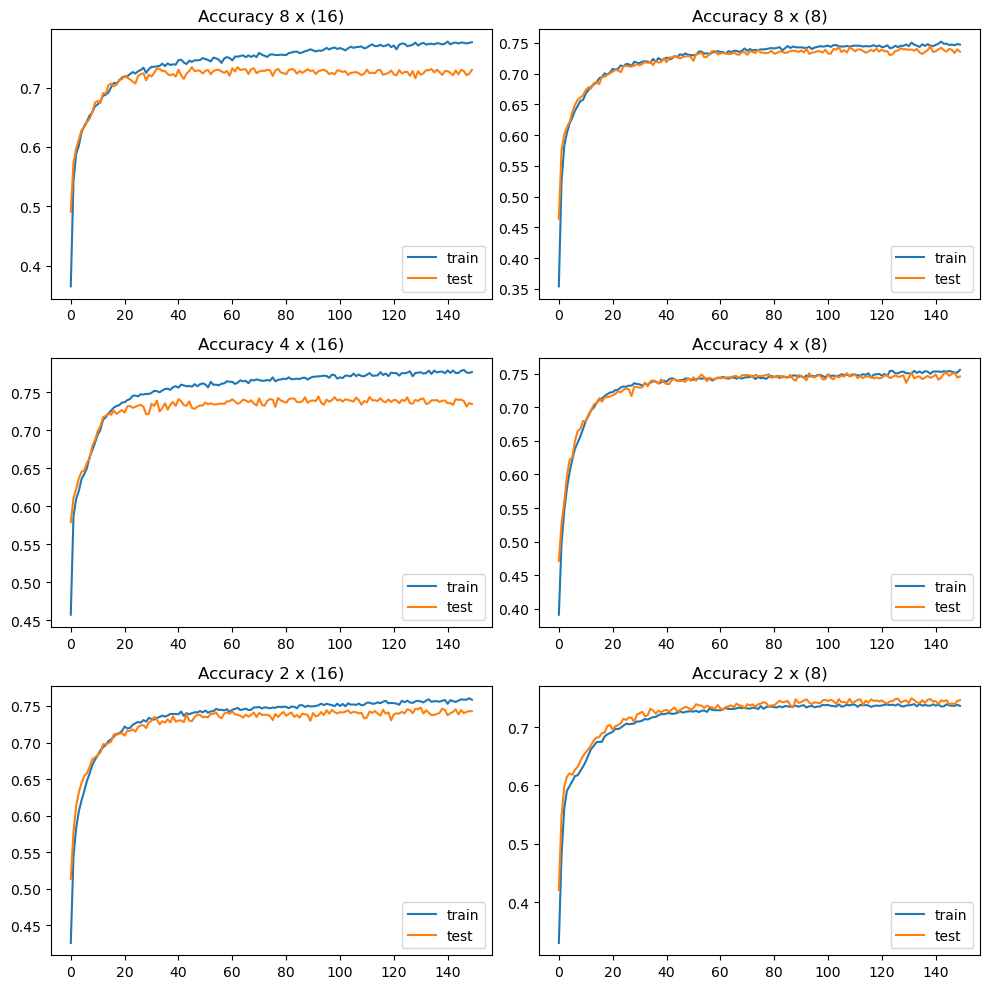

In [57]:
num_layers = [8, 4, 2]
num_nodes = [16, 8]
i = 1
plt.figure(figsize=(10, 10))
for n_layers in num_layers:
    for n_nodes in num_nodes:
        model = Sequential()
        model.add(Dense(n_nodes, input_dim=12, kernel_initializer='he_uniform', activation='relu')) 
        for _ in range(1, n_layers):
            model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(4, kernel_initializer='he_uniform', activation="softmax"))  
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
        history = model.fit(trainX, trainy, validation_data=(testX, testy), verbose=0, epochs=150, batch_size=32)

        plt.subplot(3,2,i)
        i += 1
        plt.title("Accuracy {} x ({})".format(n_layers, n_nodes))
        plt.plot(history.history['accuracy'], label='train')
        plt.plot(history.history['val_accuracy'], label='test')
        plt.legend()

plt.tight_layout()
plt.show()

Modeli koji imaju sirinu 16 brzo dostizu overfit. Najbolji model je sa 4 sloja sa po 8 neurona u svakom sloju.

**GridSearch - aktivacione funkcije i kernel initializer-i**

In [17]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(activation='relu', init_mode='he_uniform'):
    model = Sequential()
    model.add(Dense(8, input_dim=12, kernel_initializer=init_mode, activation=activation))  
    for _ in range(1, 4):
        model.add(Dense(8, activation=activation, kernel_initializer=init_mode))
    model.add(Dense(4, kernel_initializer=init_mode, activation="softmax"))  
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
    return model

model = KerasClassifier(model=create_model, verbose=0, epochs=100, batch_size=32)

param_grid = dict(model__init_mode=['uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
                  model__activation=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid']                 
                 )
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10, verbose=3)
grid_result = grid.fit(standardized,target)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


In [24]:
grid_result.best_params_, grid_result.best_score_

({'model__activation': 'tanh', 'model__init_mode': 'lecun_uniform'},
 0.7377547847023285)

In [23]:
for i in range(len(grid_result.cv_results_['params'])):
    print(grid_result.cv_results_['params'][i], grid_result.cv_results_['mean_test_score'][i])

{'model__activation': 'softmax', 'model__init_mode': 'uniform'} 0.7128903280461025
{'model__activation': 'softmax', 'model__init_mode': 'lecun_uniform'} 0.7175940499147281
{'model__activation': 'softmax', 'model__init_mode': 'normal'} 0.7119190083934324
{'model__activation': 'softmax', 'model__init_mode': 'glorot_normal'} 0.7240157502257197
{'model__activation': 'softmax', 'model__init_mode': 'glorot_uniform'} 0.7156525810083266
{'model__activation': 'softmax', 'model__init_mode': 'he_normal'} 0.7237169640966192
{'model__activation': 'softmax', 'model__init_mode': 'he_uniform'} 0.7171456756545874
{'model__activation': 'softplus', 'model__init_mode': 'uniform'} 0.723866329294528
{'model__activation': 'softplus', 'model__init_mode': 'lecun_uniform'} 0.7332758908965256
{'model__activation': 'softplus', 'model__init_mode': 'normal'} 0.7225225998461762
{'model__activation': 'softplus', 'model__init_mode': 'glorot_normal'} 0.729093553888511
{'model__activation': 'softplus', 'model__init_mode

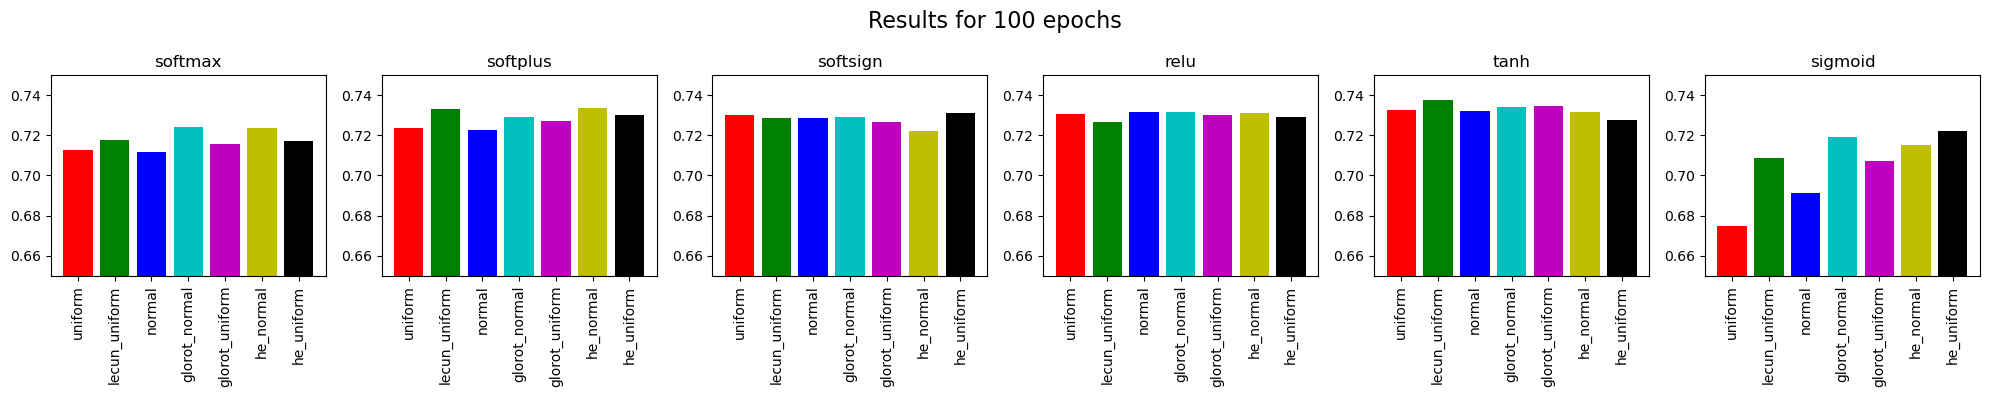

In [93]:
results = np.array([[0.7128903280461025, 0.7175940499147281, 0.7119190083934324, 0.7240157502257197, 
            0.7156525810083266, 0.7237169640966192, 0.7171456756545874],
           [0.723866329294528, 0.7332758908965256, 0.7225225998461762, 0.729093553888511,
            0.7270022181846556, 0.7337967184243086, 0.7299892992097021],
           [0.7301390545405905, 0.7287947120261277, 0.728870286357607, 0.7290925506894207,
            0.7264799973248024, 0.722298217649616, 0.7311837749267107],
           [0.7305859797353784, 0.7267800653194075, 0.7318582033818956, 0.731931771315194,
            0.7302141272725245, 0.7311103741932607, 0.7293166542195668],
           [0.7325281731744563, 0.7377547847023285, 0.732230445977729, 0.7342456500172774,
            0.734768818342938, 0.7317065531193918, 0.7276747517082252],
           [0.6750292042401882, 0.7089318716351031, 0.6914574810785504, 0.7192363425590493,
            0.7073635370570598, 0.7149821096162207, 0.7221482393855962]])
fig, axs = plt.subplots(1, results.shape[0], figsize=(20, 4))
fig.suptitle("Results for 100 epochs", fontsize=16)
activations = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid']
init_modes = ['uniform','lecun_uniform','normal','glorot_normal','glorot_uniform','he_normal','he_uniform']
for i in range(results.shape[0]):
    axs[i].bar(init_modes, results[i], color=['r','g','b','c','m','y','k'])
    axs[i].set_ylim([0.65, 0.75])
    axs[i].set_xticks(init_modes)
    axs[i].set_xticklabels(init_modes, rotation=90)
    axs[i].set_title(activations[i])
plt.tight_layout()
plt.show()

Najbolje aktivacione fukncije su Relu i Tanh, dok je najgora Sigmoid. Ona ce posebno biti analizirana kako bi se saznalo da li ce ona posle odredjenog broja epoha dostici bolje rezultate.

In [98]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(activation='relu', init_mode='he_uniform'):
    model = Sequential()
    model.add(Dense(8, input_dim=12, kernel_initializer=init_mode, activation="sigmoid"))  
    for _ in range(1, 4):
        model.add(Dense(8, activation="sigmoid", kernel_initializer=init_mode))
    model.add(Dense(4, kernel_initializer=init_mode, activation="softmax"))  
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
    return model

model = KerasClassifier(model=create_model, verbose=0, batch_size=32)

param_grid = dict(epochs=[50, 100, 150, 200],
                  model__init_mode=['uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],                
                 )
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=3)
grid_result = grid.fit(standardized,target)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [104]:
grid_result.best_params_

{'epochs': 200, 'model__init_mode': 'lecun_uniform'}

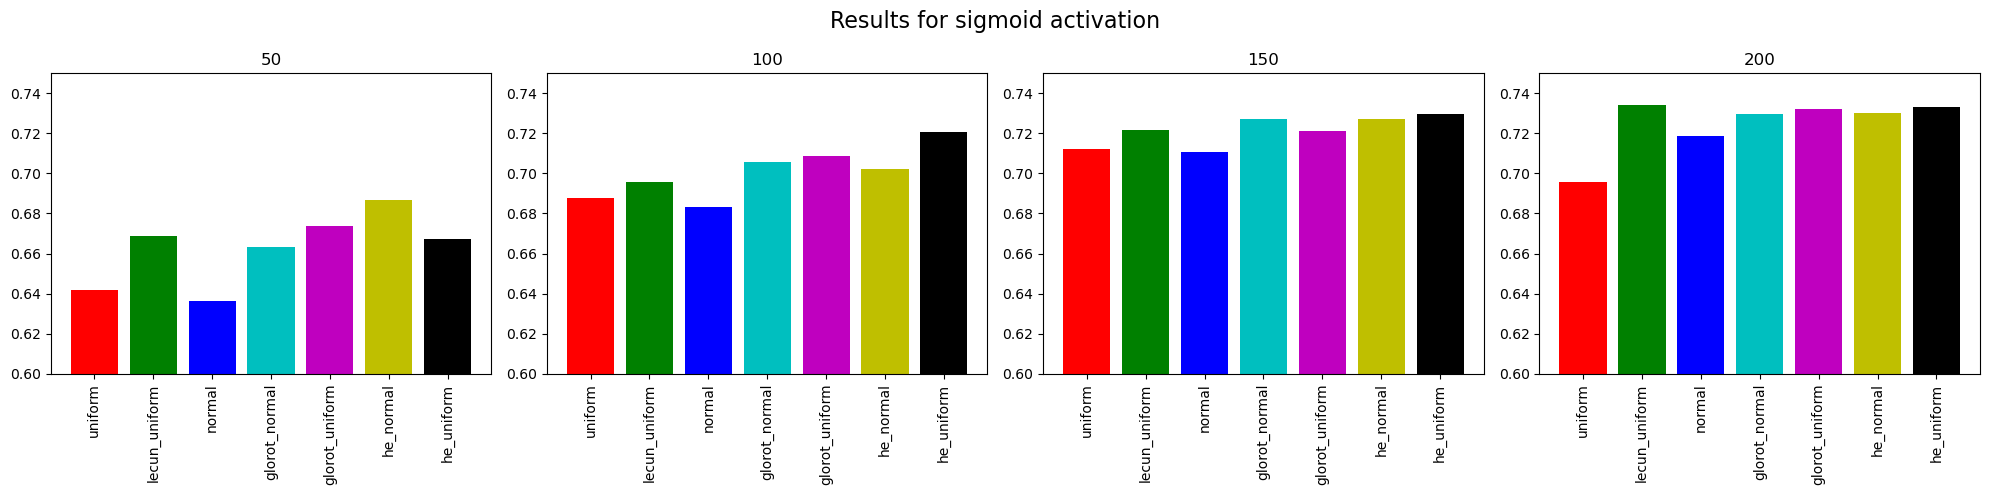

In [103]:
results = []
for i in range(4):
    res = []
    for j in range(7):
        res.append(grid_result.cv_results_['mean_test_score'][7*i+j])
    results.append(res)
results = np.array(results)
fig, axs = plt.subplots(1, results.shape[0], figsize=(20, 5))
fig.suptitle("Results for sigmoid activation", fontsize=16)
epochs = [50, 100, 150, 200]
init_modes = ['uniform','lecun_uniform','normal','glorot_normal','glorot_uniform','he_normal','he_uniform']
for i in range(results.shape[0]):
    axs[i].bar(init_modes, results[i], color=['r','g','b','c','m','y','k'])
    axs[i].set_ylim([0.6, 0.75])
    axs[i].set_xticks(init_modes)
    axs[i].set_xticklabels(init_modes, rotation=90)
    axs[i].set_title(epochs[i])
plt.tight_layout()
plt.show()

Ni posle 200 epoha Sigmoid aktivaciona funkcija ne dostize bolje rezultate od Relu i Tanh.

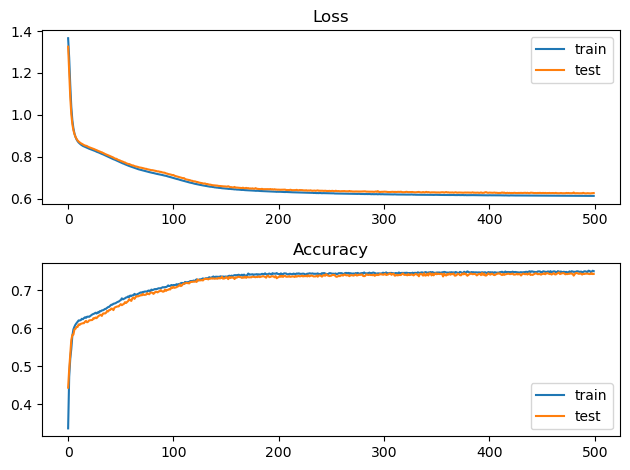

In [110]:
model = Sequential()
model.add(Dense(8, input_dim=12, kernel_initializer=init_mode, activation="sigmoid"))  
for _ in range(1, 4):
    model.add(Dense(8, activation="sigmoid", kernel_initializer=init_mode))
model.add(Dense(4, kernel_initializer='he_uniform', activation="softmax"))  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history = model.fit(trainX, trainy, validation_data=(testX, testy), verbose=0, epochs=500, batch_size=32)

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

------------

Ovde je cilj naci najbolju aktivacionu funkciju.

In [70]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(activation='relu', init_mode='he_uniform'):
    model = Sequential()
    model.add(Dense(8, input_dim=12, kernel_initializer=init_mode, activation=activation))  
    for _ in range(1, 4):
        model.add(Dense(8, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(4, kernel_initializer=init_mode, activation="softmax")) 
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
    return model

model = KerasClassifier(model=create_model, verbose=0, epochs=150, batch_size=64)

param_grid = dict(model__init_mode=['uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
                  model__activation=['relu', 'tanh']                 
                 )
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=3)
grid_result = grid.fit(standardized,target)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [71]:
grid_result.best_params_, grid_result.best_score_

({'model__activation': 'tanh', 'model__init_mode': 'glorot_uniform'},
 0.7430564278747017)

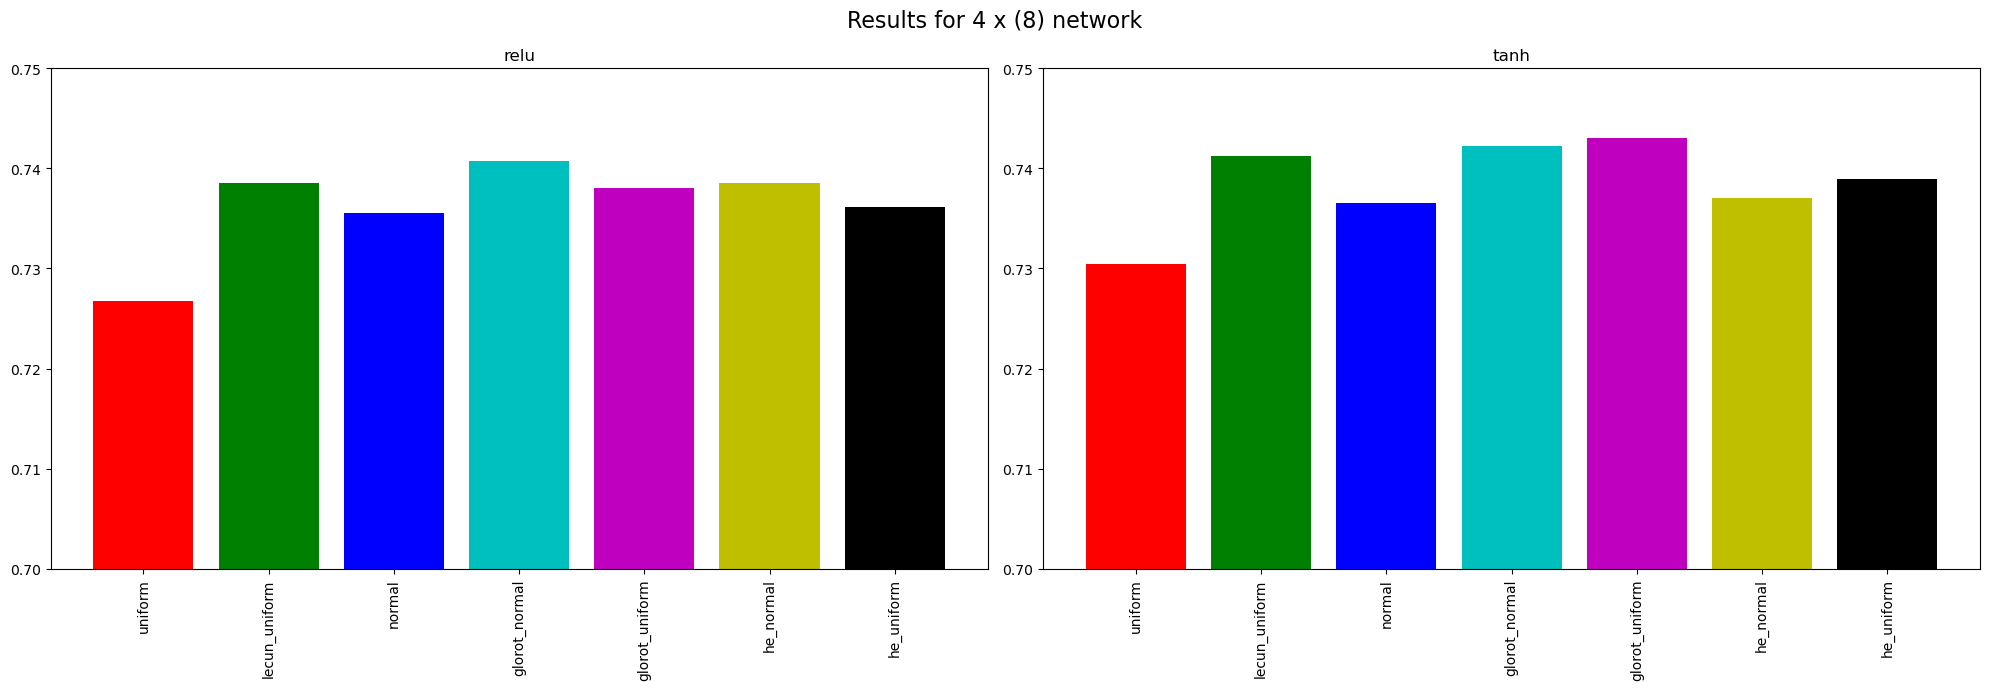

In [80]:
results = []
for i in range(2):
    res = []
    for j in range(7):
        res.append(grid_result.cv_results_['mean_test_score'][7*i+j])
    results.append(res)
results = np.array(results)
fig, axs = plt.subplots(1, results.shape[0], figsize=(20, 7))
fig.suptitle("Results for 4 x (8) network", fontsize=16)
activations = ['relu', 'tanh']
init_modes = ['uniform','lecun_uniform','normal','glorot_normal','glorot_uniform','he_normal','he_uniform']
for i in range(results.shape[0]):
    axs[i].bar(init_modes, results[i], color=['r','g','b','c','m','y','k'])
    axs[i].set_ylim([0.7, 0.75])
    axs[i].set_xticks(init_modes)
    axs[i].set_xticklabels(init_modes, rotation=90)
    axs[i].set_title(activations[i])
plt.tight_layout()
plt.show()

Grafik pokazuje da je Tanh u kombinaciji sa glorot_uniform kernel initializer-om najbolja aktivaciona funkcija.

**GridSearch - optimizer**

In [91]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', activation='tanh'))  
    for _ in range(1, 4):
        model.add(Dense(8, kernel_initializer='glorot_uniform', activation='tanh'))
    model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax")) 
    return model

model = KerasClassifier(model=create_model, verbose=0, loss='categorical_crossentropy', metrics=['accuracy'],
                        epochs=150, batch_size=64)

param_grid = dict(optimizer=['SGD','RMSprop', 'Adadelta', 'Adam', 'Nadam'])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=3)
grid_result = grid.fit(standardized,target)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [92]:
grid_result.best_params_, grid_result.best_score_

({'optimizer': 'Adam'}, 0.7429080941273942)

In [94]:
grid_result.cv_results_['mean_test_score']

array([0.73305072, 0.74059182, 0.36089236, 0.74290809, 0.7414128 ])

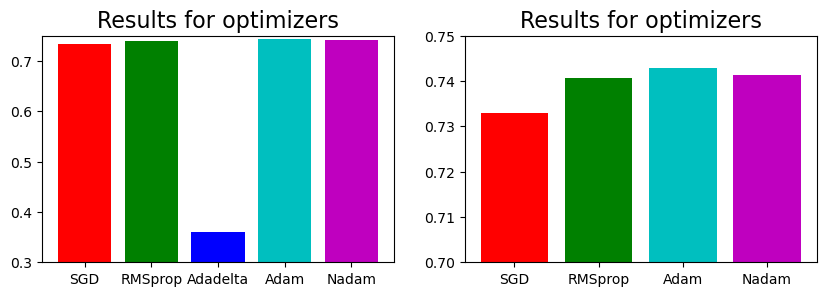

In [111]:
plt.figure(figsize=(10, 10))

plt.subplot(321)
plt.title("Results for optimizers", fontsize=16)
optimizers = ['SGD','RMSprop', 'Adadelta', 'Adam', 'Nadam']
plt.bar(optimizers, grid_result.cv_results_['mean_test_score'], color=['r','g','b','c','m'])
plt.ylim([0.3, 0.75])

plt.subplot(322)
scores = grid_result.cv_results_['mean_test_score']
scores = np.delete(scores, 2)
scores
plt.title("Results for optimizers", fontsize=16)
optimizers = ['SGD','RMSprop', 'Adam', 'Nadam']
plt.bar(optimizers, scores, color=['r','g','c','m'])
plt.ylim([0.7, 0.75])
plt.show()

Najbolji rezultat daje Adam optimizer.

**GridSearch - broj epoha i batch size**

In [19]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', activation='tanh'))  
    for _ in range(1, 4):
        model.add(Dense(8, kernel_initializer='glorot_uniform', activation='tanh'))
    model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax")) 
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
    return model

model = KerasClassifier(model=create_model, verbose=0)

param_grid = dict(batch_size=[32, 64, 128], epochs=[100, 150, 200, 250])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=3)
grid_result = grid.fit(standardized,target)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [21]:
grid_result.best_params_, grid_result.best_score_

({'batch_size': 32, 'epochs': 200}, 0.7496276045173076)

In [25]:
grid_result.cv_results_['mean_test_score']

array([0.7373808 , 0.74604301, 0.7496276 , 0.74850661, 0.74051714,
       0.74649107, 0.73962153, 0.74858171, 0.7356638 , 0.74051739,
       0.74581957, 0.74492207])

**GridSearch - learning rate optimizer-a**

In [27]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', activation='tanh'))  
    for _ in range(1, 4):
        model.add(Dense(8, kernel_initializer='glorot_uniform', activation='tanh'))
    model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax")) 
    return model

model = KerasClassifier(model=create_model, verbose=0, epochs=200, batch_size=32, 
                        loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

param_grid = dict(optimizer__learning_rate=[0.001, 0.01, 0.1, 0.2, 0.3])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=3)
grid_result = grid.fit(standardized,target)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [39]:
grid_result.best_score_, grid_result.best_params_

(0.741637542125697, {'optimizer__learning_rate': 0.001})

-----

### 4. Analiza rezultata:

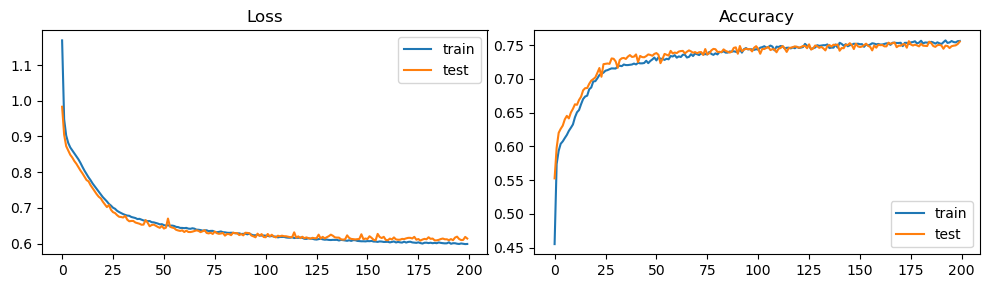

In [31]:
model = Sequential()
model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', activation='tanh')) 
for _ in range(1, 4):
    model.add(Dense(8, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax"))  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history = model.fit(trainX, trainy, validation_data=(testX, testy), verbose=0, epochs=200, batch_size=32)

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(322)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
history.history['val_accuracy']

[0.5525136590003967,
 0.5978098511695862,
 0.6199601888656616,
 0.6259332895278931,
 0.6306620240211487,
 0.6398705840110779,
 0.6450970768928528,
 0.6413638591766357,
 0.6500746607780457,
 0.6555500030517578,
 0.6622697710990906,
 0.661523163318634,
 0.6687406897544861,
 0.6734693646430969,
 0.6829268336296082,
 0.6861622929573059,
 0.6864111423492432,
 0.6926331520080566,
 0.6973618865013123,
 0.6996017694473267,
 0.7020906209945679,
 0.7088103294372559,
 0.7160278558731079,
 0.7030861377716064,
 0.7217521071434021,
 0.7222498655319214,
 0.7227476239204407,
 0.7222498655319214,
 0.7302140593528748,
 0.7297163009643555,
 0.7257341742515564,
 0.7162767648696899,
 0.7279741168022156,
 0.730462908744812,
 0.7309606671333313,
 0.7294673919677734,
 0.7329517006874084,
 0.7351916432380676,
 0.7324539422988892,
 0.7329517006874084,
 0.7361871600151062,
 0.7247386574745178,
 0.733947217464447,
 0.7322050929069519,
 0.7319561839103699,
 0.7336983680725098,
 0.7361871600151062,
 0.7354404926300

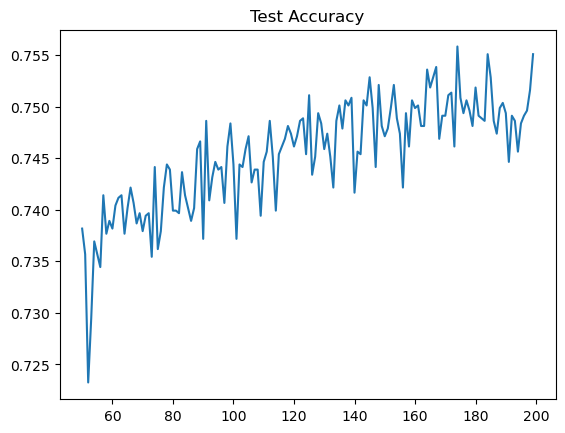

In [35]:
plt.plot(range(50,200), history.history['val_accuracy'][50:])
plt.title('Test Accuracy')
plt.show()

Val_accuracy se na grafiku konstantno poboljsava do konacne vrednosti oko 0.75.

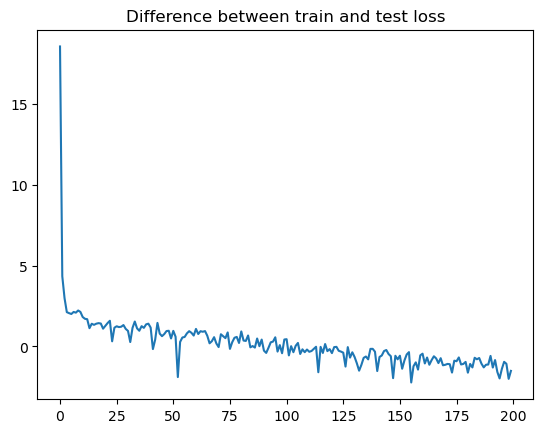

In [37]:
diff = np.array(history.history['loss'])*100 - np.array(history.history['val_loss'])*100
plt.plot(diff)
plt.title("Difference between train and test loss")
plt.show()

-----------

### 5. Metode za kontrolu overfit-a:

**Smanjenje overfit-a pomoću L2 kernel weight regularizer-a:**

In [43]:
from keras.regularizers import l2

def create_model(kernel_regularizer=l2(0.01)):
    model = Sequential()
    model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', kernel_regularizer=kernel_regularizer,
                    activation='tanh'))  
    for _ in range(1, 4):
        model.add(Dense(8, kernel_initializer='glorot_uniform', kernel_regularizer=kernel_regularizer, activation='tanh'))
    model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax")) 
    return model

model = KerasClassifier(model=create_model, verbose=0, loss='categorical_crossentropy', metrics=['accuracy'],
                        epochs=200, batch_size=32)

param_grid = dict(model__kernel_regularizer = [l2(1e-1), l2(1e-2), l2(1e-3), l2(1e-4), l2(1e-5), l2(1e-6)])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=3, return_train_score=True)
grid_result = grid.fit(standardized,target)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [48]:
grid_result.best_score_, grid_result.best_params_['model__kernel_regularizer'].l2

(0.7466409696081686, array(1.e-06, dtype=float32))

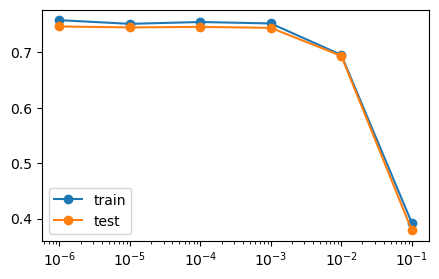

In [52]:
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
plt.figure(figsize=(5,3))
plt.semilogx(values, grid_result.cv_results_['mean_train_score'], label='train', marker='o')
plt.semilogx(values, grid_result.cv_results_['mean_test_score'], label='test', marker='o')
plt.legend()
plt.show()

**Smanjenje overfit-a pomoću Dropout-a:**

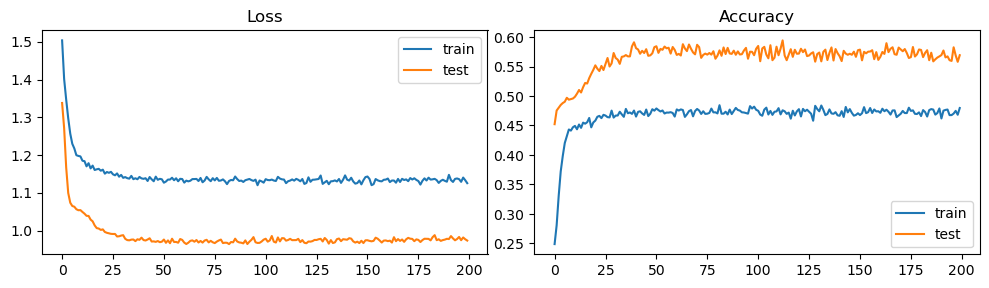

In [54]:
from keras.layers import Dropout

model = Sequential()
model.add(Dropout(0.2, input_dim=12))
model.add(Dense(8, kernel_initializer='glorot_uniform', activation='tanh')) 
for _ in range(1, 4):
    model.add(Dropout(0.5))
    model.add(Dense(8, kernel_initializer='glorot_uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax"))  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history = model.fit(trainX, trainy, validation_data=(testX, testy), verbose=0, epochs=200, batch_size=32)

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(322)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

Dropout nije dao dobre rezultate.

**Smanjenje overfit-a pomoću EarlyStopping-a:**

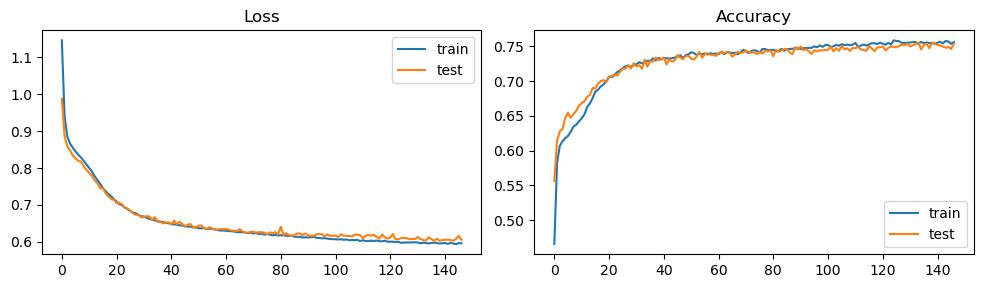

In [62]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', activation='tanh')) 
for _ in range(1, 4):
    model.add(Dense(8, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax"))  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

callbacks = [EarlyStopping(monitor='val_loss', patience=10), 
             ModelCheckpoint(filepath='models/best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(trainX, trainy, validation_data=(testX, testy), verbose=0, epochs=200, batch_size=32, callbacks=callbacks)

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(322)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

Early Stopping je dao najbolje rezultate nakon 150 epoha.

In [63]:
history.history['val_accuracy']

[0.5562468767166138,
 0.6147336959838867,
 0.6274265646934509,
 0.6316575407981873,
 0.6473369598388672,
 0.6545544862747192,
 0.6473369598388672,
 0.6525634527206421,
 0.6572921872138977,
 0.6645097136497498,
 0.6682429313659668,
 0.6709805727005005,
 0.677202582359314,
 0.6804380416870117,
 0.6898954510688782,
 0.6893976926803589,
 0.6963663697242737,
 0.700099527835846,
 0.7013439536094666,
 0.6986062526702881,
 0.7053260207176208,
 0.7078148126602173,
 0.7085614800453186,
 0.7080637216567993,
 0.7135390639305115,
 0.7175211310386658,
 0.7180188894271851,
 0.7224987745285034,
 0.7180188894271851,
 0.7254853248596191,
 0.7210054993629456,
 0.7227476239204407,
 0.7177700400352478,
 0.730711817741394,
 0.7207565903663635,
 0.7284718751907349,
 0.7279741168022156,
 0.733947217464447,
 0.730462908744812,
 0.7309606671333313,
 0.733947217464447,
 0.7239920496940613,
 0.7314584255218506,
 0.7279741168022156,
 0.7297163009643555,
 0.7374315857887268,
 0.7336983680725098,
 0.7314584255218506

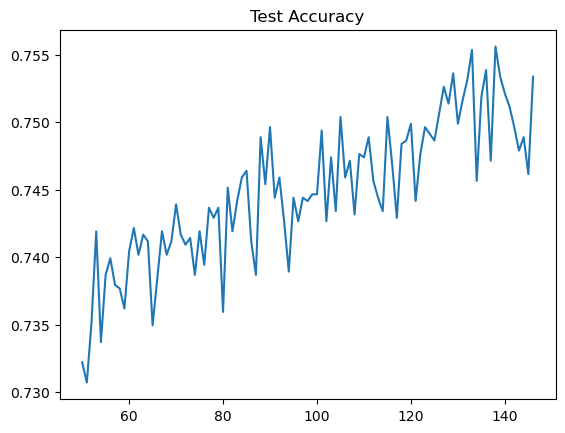

In [64]:
l = len(history.history['val_accuracy'])
plt.plot(range(50,l), history.history['val_accuracy'][50:])
plt.title('Test Accuracy')
plt.show()

In [66]:
loss, accuracy = model.evaluate(testX, testy, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.34


----------

**Obučavanje na normalizovanim podacima**

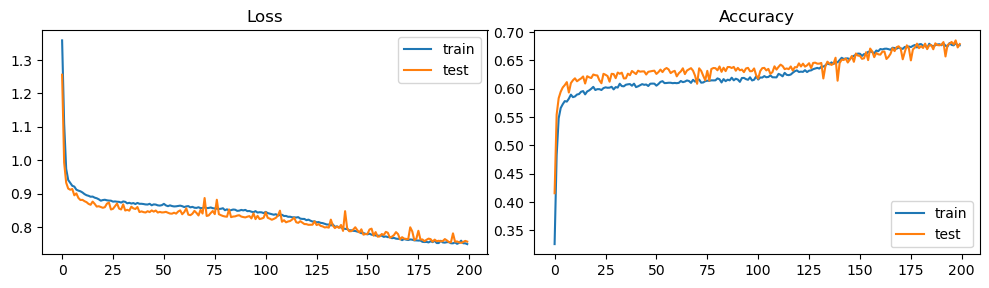

In [137]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', activation='tanh')) 
for _ in range(1, 4):
    model.add(Dense(8, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax"))  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

callbacks = [EarlyStopping(monitor='val_loss', patience=10), 
             ModelCheckpoint(filepath='models/best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(trainX_norm, trainy_norm, validation_data=(testX_norm, testy_norm), verbose=0, epochs=200, batch_size=32, callbacks=callbacks)

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(322)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

In [138]:
loss, accuracy = model.evaluate(testX_norm, testy_norm, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 67.89


-------

**Obučavanje na podacima sa binovanim godinama**

In [115]:
scaler = StandardScaler()
norm = Normalizer()

features_binned_age = dataframe_binned_age.drop(['A','B','C','D'], axis=1).to_numpy()
target_binned_age = dataframe_binned_age.iloc[:, -4:].to_numpy()

standardized_binned_age = scaler.fit_transform(features_binned_age)
normalized_binned_age = norm.fit_transform(target_binned_age)

trainX_binned_age, testX_binned_age, trainy_binned_age, testy_binned_age= train_test_split(standardized_binned_age, target_binned_age, test_size=0.3, random_state=0)

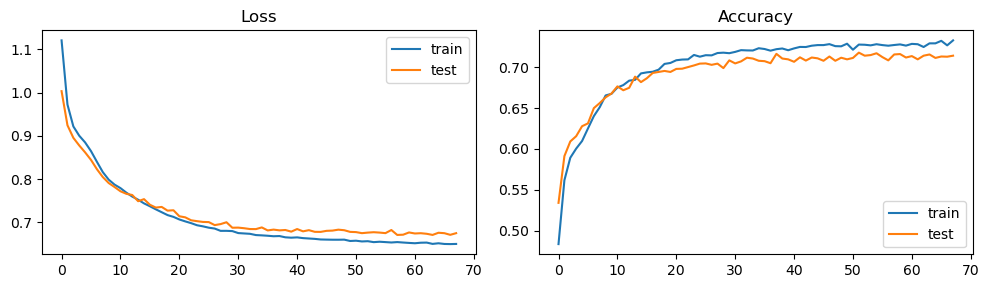

In [116]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(8, input_dim=15, kernel_initializer='glorot_uniform', activation='tanh')) 
for _ in range(1, 4):
    model.add(Dense(8, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax"))  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

callbacks = [EarlyStopping(monitor='val_loss', patience=10), 
             ModelCheckpoint(filepath='models/best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(trainX_binned_age, trainy_binned_age, validation_data=(testX_binned_age, testy_binned_age), 
                    verbose=0, epochs=200, batch_size=32, callbacks=callbacks)

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(322)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

---------

**Obučavanje na podacima sa redukovanom dimenzijom (PCA)**

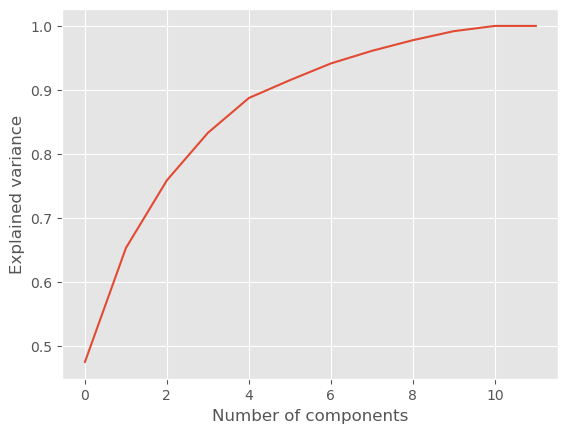

In [140]:
from sklearn.decomposition import PCA
plt.style.use('ggplot')

pca = PCA(n_components=12, random_state=0)
pca.fit(standardized)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()
plt.style.use('default')

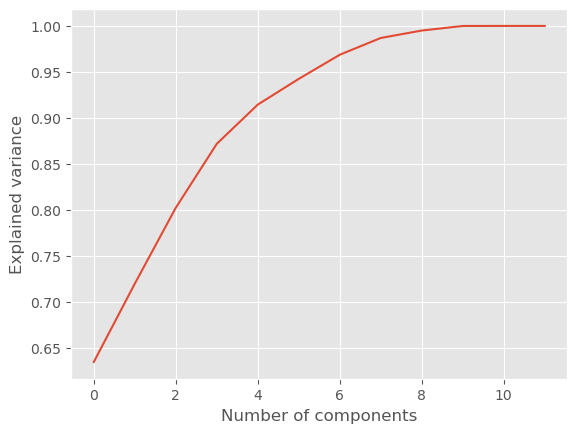

In [119]:
from sklearn.decomposition import PCA
plt.style.use('ggplot')

pca = PCA(n_components=12, random_state=0)
pca.fit(normalized)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()
plt.style.use('default')

In [121]:
pca = PCA(n_components=0.95)
pca.fit(standardized)
pca.n_components_

8

In [120]:
pca = PCA(n_components=0.95)
pca.fit(normalized)
pca.n_components_

7

In [141]:
pca = PCA(n_components=8)
standardized_PCA = pca.fit_transform(standardized)
df_PCA = pd.DataFrame(standardized_PCA, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
df_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.369869,0.720967,0.375044,0.353374,0.491212,0.694046,0.168648,-0.303888
1,-1.052190,1.472480,0.385842,-0.630527,-1.145304,0.699182,0.173868,0.590538
2,-2.249734,-1.242066,0.673864,0.671963,-0.359306,-0.598324,-0.313915,-0.275392
3,-1.976698,0.148696,0.423996,-0.108786,-0.236790,0.092047,-0.966825,0.069310
4,-1.469506,1.461441,0.351796,-0.583637,0.796510,-0.190218,-0.199750,0.852092
...,...,...,...,...,...,...,...,...
13387,-1.429039,0.540244,0.223571,-0.050706,-0.301235,-0.180450,-0.831789,0.591392
13388,-1.418307,0.678831,-1.355914,0.025431,-1.857691,-1.013875,-0.430985,-0.158826
13389,-2.781960,-0.075289,-0.196596,-0.227221,1.157688,-0.007174,0.078667,-0.269311
13390,5.709688,-2.052267,-1.714068,-0.622001,0.559033,0.810884,-0.188469,0.287329


In [144]:
trainX_pca, testX_pca, trainy_pca, testy_pca = train_test_split(standardized_PCA, target, test_size=0.3, random_state=0)

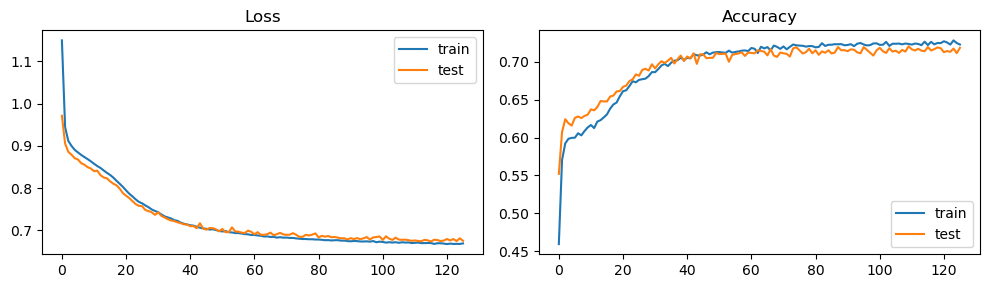

In [145]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='glorot_uniform', activation='tanh')) 
for _ in range(1, 4):
    model.add(Dense(8, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax"))  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

callbacks = [EarlyStopping(monitor='val_loss', patience=10), 
             ModelCheckpoint(filepath='models/best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(trainX_pca, trainy_pca, validation_data=(testX_pca, testy_pca), 
                    verbose=0, epochs=200, batch_size=32, callbacks=callbacks)

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(322)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

In [146]:
loss, accuracy = model.evaluate(testX_pca, testy_pca, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 71.83


----------------

**Obučavanje na podacima bez outlier-a**

In [168]:
scaler = StandardScaler()

features_no_outliers = dataframe_no_outliers.drop(['A','B','C','D'], axis=1).to_numpy()
target_no_outliers = dataframe_no_outliers.iloc[:, -4:].to_numpy()

standardized_no_outliers = scaler.fit_transform(features_no_outliers)

trainX_no_outliers, testX_no_outliers, trainy_no_outliers, testy_no_outliers = train_test_split(standardized_no_outliers, target_no_outliers, test_size=0.3, random_state=0)

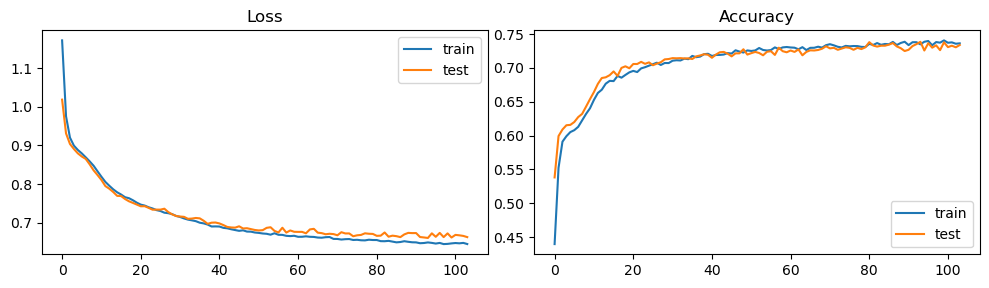

In [177]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', activation='tanh')) 
for _ in range(1, 4):
    model.add(Dense(8, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax"))  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

callbacks = [EarlyStopping(monitor='val_loss', patience=10), 
             ModelCheckpoint(filepath='models/best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(trainX_no_outliers, trainy_no_outliers, validation_data=(testX_no_outliers, testy_no_outliers), 
                    verbose=0, epochs=200, batch_size=32, callbacks=callbacks)

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(322)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

In [178]:
loss, accuracy = model.evaluate(testX_no_outliers, testy_no_outliers, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 73.36


Poredjenjem svih dobijenih rezultata, zakljuceno je da je najbolje korisiti standardizovane feature-e, bez binovanih godina i sa "outlier-ima".

-------

### 6. Custom loss funkcija i custom learning rate:

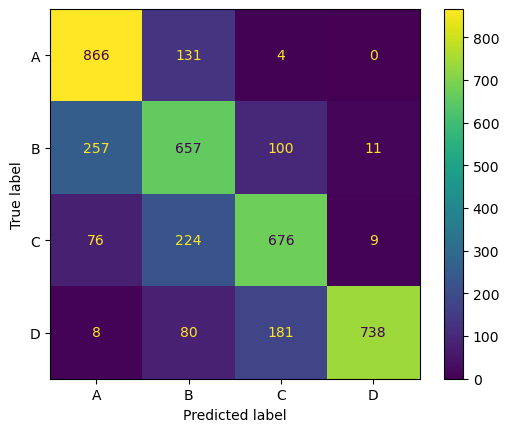

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

pred = model.predict(testX, verbose=0).argmax(1)
ConfusionMatrixDisplay.from_predictions(testy.argmax(1), pred, display_labels=['A','B','C','D'])
plt.show()

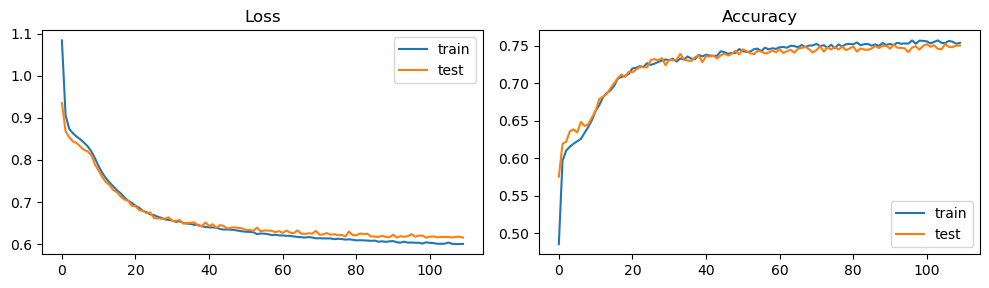

In [42]:
from keras import backend as K
import tensorflow as tf

def weighted_categorical_crossentropy(weights):
    
    weights = K.variable(weights)
        
    def loss(y_true, y_pred):
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        y_true= tf.cast(y_true, tf.float32)
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    
    return loss

weights = np.array([1, 1, 1, 1])

from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', activation='tanh')) 
for _ in range(1, 4):
    model.add(Dense(8, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax"))  
model.compile(loss=weighted_categorical_crossentropy(weights), metrics=['accuracy'], optimizer='adam') 

callbacks = [EarlyStopping(monitor='val_loss', patience=10), 
             ModelCheckpoint(filepath='models/best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(trainX, trainy, validation_data=(testX, testy), verbose=0, epochs=200, batch_size=32, callbacks=callbacks)

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(322)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
loss, accuracy = model.evaluate(testX, testy, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.01


Custom loss funkcija je isprobavana za razlicite kombinacije tezina klasa, kako bi se klase koje se malo gore predvidjaju od ostalih tacnije predvidjale. Medjutim, ovaj dataset je savrseno balansiran, a ni jedna klasa nije znacajnija od druge, tako da najobicniji Categorical Cross-Entropy daje najbolje rezultate.

**Custom Learning Rate i Custom Loss Funkcija:**

Ideja je menjati vrednost za learning rate tako da u pocetnim epohama ima najvecu vrednost, pa u kasnijim se smanjuje na sledecu manju vrednost iz opsega vrednosti *values*.

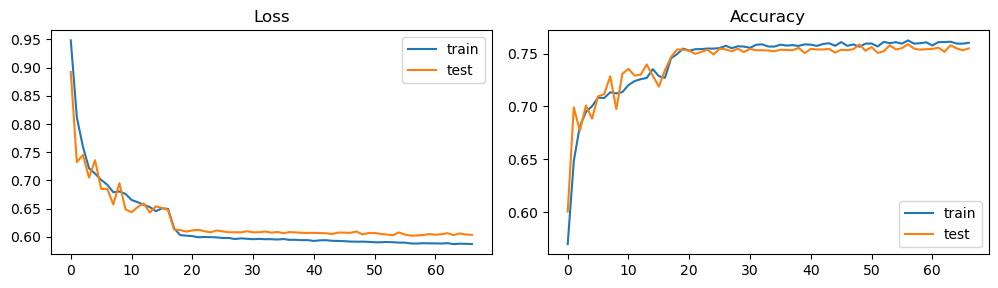

In [46]:
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay
from keras.callbacks import EarlyStopping, ModelCheckpoint

boundaries = [5000, 40000]
values = [0.01, 0.001, 0.0001]
learning_rate_schedule = PiecewiseConstantDecay(boundaries, values)
optimizer = keras.optimizers.Adam(learning_rate=learning_rate_schedule)

weights = np.array([1, 1, 1, 1])

model = Sequential()
model.add(Dense(8, input_dim=12, kernel_initializer='glorot_uniform', activation='tanh')) 
for _ in range(1, 4):
    model.add(Dense(8, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation="softmax"))  
model.compile(loss=weighted_categorical_crossentropy(weights), metrics=['accuracy'], optimizer=optimizer) 

callbacks = [EarlyStopping(monitor='val_loss', patience=10), 
             ModelCheckpoint(filepath='models/best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(trainX, trainy, validation_data=(testX, testy), verbose=0, epochs=200, batch_size=32, callbacks=callbacks)

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(322)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
loss, accuracy = model.evaluate(testX, testy, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.49


Custom learning rate scheduler daje nad najboljim modelom jos bolje rezultate. 

--------

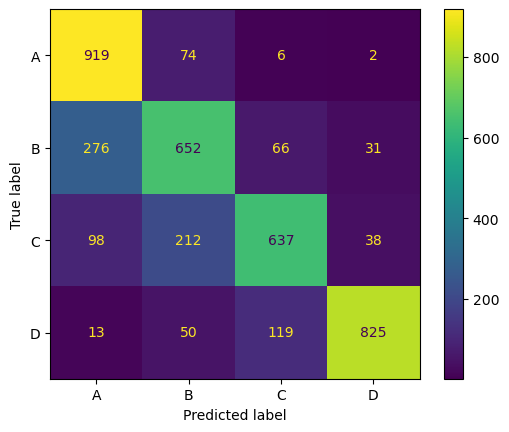

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

pred = model.predict(testX, verbose=0).argmax(1)
ConfusionMatrixDisplay.from_predictions(testy.argmax(1), pred, display_labels=['A','B','C','D'])
plt.show()

In [57]:
pred=model.predict(testX)

126/126 [==============================] - 0s 1ms/step


In [59]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(testy, pred, multi_class='ovr'))

0.9255507784866048


In [64]:
from sklearn.metrics import f1_score
print(f1_score(testy.argmax(1), pred.argmax(1),average=None))

[0.79670568 0.64778937 0.7027027  0.86705202]
